# 1. Regression

## 1.1. Load Data and Train Model

In [4]:
from sklearn.linear_model import LinearRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import mean_squared_error

dataset = load_dataset('us_crime')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['train']
test = dataset['test']

model = LinearRegression()
model.fit(train['X'], train['y'])

mean_squared_error(test['y'], model.predict(test['X']))

np.float64(0.01902558611293644)

In [5]:
from holisticai.explainability.metrics import regression_explainability_metrics
from holisticai.utils import RegressionProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = RegressionProxy(predict=model.predict)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type="conditional")

regression_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.158416,0.0
XAI Ease Score,1.000000,1.0
Position Parity,0.045947,1.0
Rank Alignment,0.753692,1.0
Spread Ratio,0.692673,0.0
Spread Divergence,0.332569,0.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

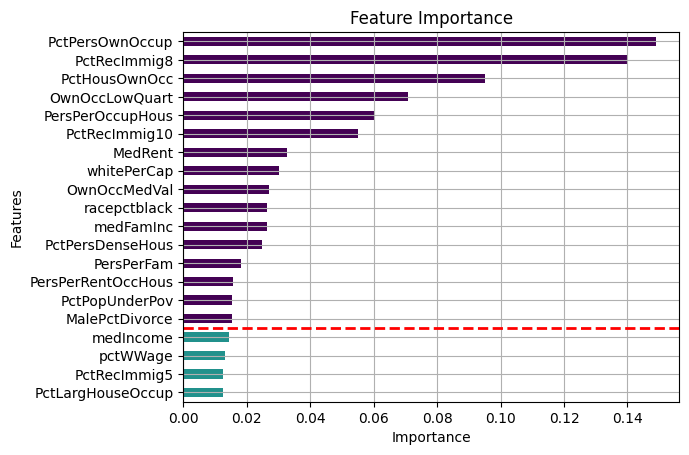

In [6]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

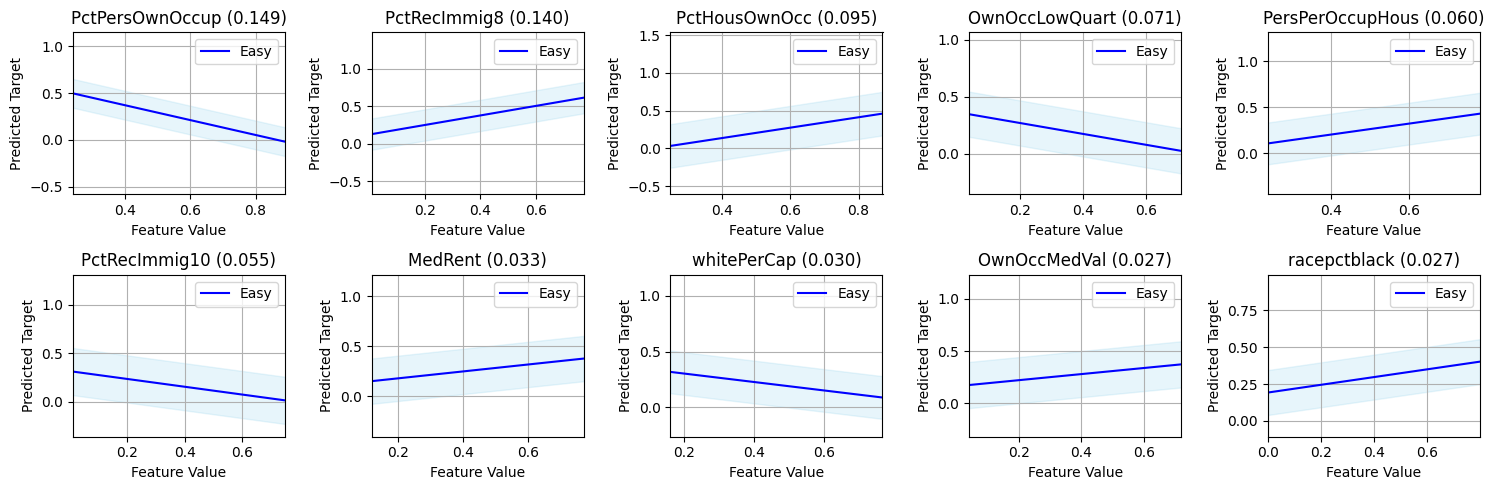

In [7]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2, 5), figsize=(15,5))

# 2. Classification

In [8]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset('adult')
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.7957987838584853

In [9]:
from holisticai.explainability.metrics import classification_explainability_metrics
from holisticai.utils import BinaryClassificationProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = BinaryClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type="conditional")

classification_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.020619,0.0
XAI Ease Score,0.750000,1.0
Position Parity,0.625000,1.0
Rank Alignment,0.625000,1.0
Spread Ratio,0.195386,0.0
Spread Divergence,0.076413,0.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

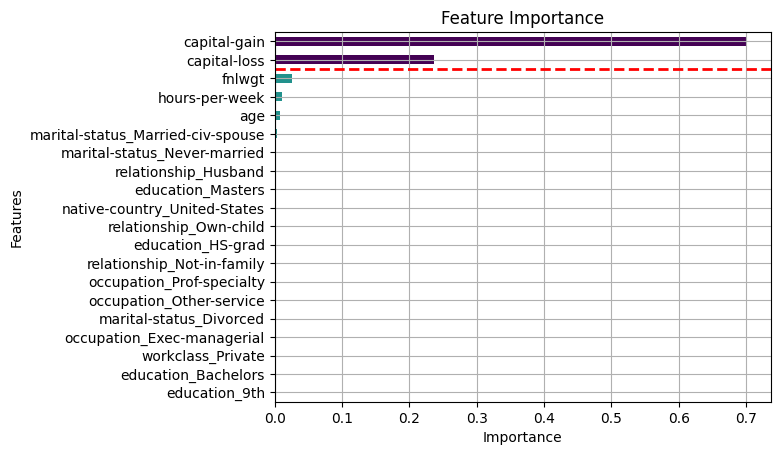

In [10]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

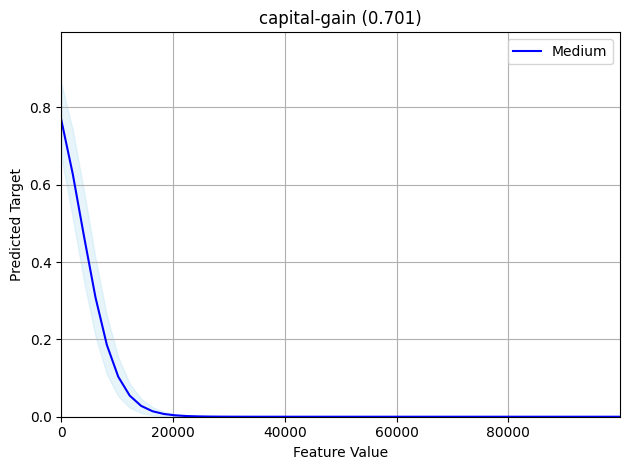

In [11]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, class_idx=1)

# 3. Multi Classification

In [12]:
from sklearn.linear_model import LogisticRegression
from holisticai.datasets import load_dataset
from sklearn.metrics import accuracy_score

dataset = load_dataset(dataset_name="student_multiclass")
dataset = dataset.train_test_split(test_size=0.2, random_state=42)
train = dataset['test']
test = dataset['test']

model = LogisticRegression()
model.fit(train['X'], train['y'])

accuracy_score(test['y'], model.predict(test['X']))

0.810126582278481

In [13]:
from holisticai.explainability.metrics import multiclass_explainability_metrics
from holisticai.utils import MultiClassificationProxy
from holisticai.utils.feature_importances import compute_permutation_feature_importance
from holisticai.utils.inspection import compute_partial_dependence

proxy = MultiClassificationProxy(predict=model.predict, predict_proba=model.predict_proba, classes=model.classes_)

importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy)

ranked_importances = importances.top_alpha(0.8)

partial_dependencies = compute_partial_dependence(train['X'], features=ranked_importances.feature_names, proxy=proxy)

conditional_importances  = compute_permutation_feature_importance(X=train['X'], y=train['y'], proxy=proxy, importance_type="conditional")

multiclass_explainability_metrics(importances, partial_dependencies, conditional_importances)

,value,reference
metric,,
Alpha Importance Score,0.461538,0.0
XAI Ease Score,0.902778,1.0
Position Parity,0.086200,1.0
Rank Alignment,0.484193,1.0
Spread Ratio,0.887988,0.0
Spread Divergence,0.639405,0.0


<Axes: title={'center': 'Feature Importance'}, xlabel='Importance', ylabel='Features'>

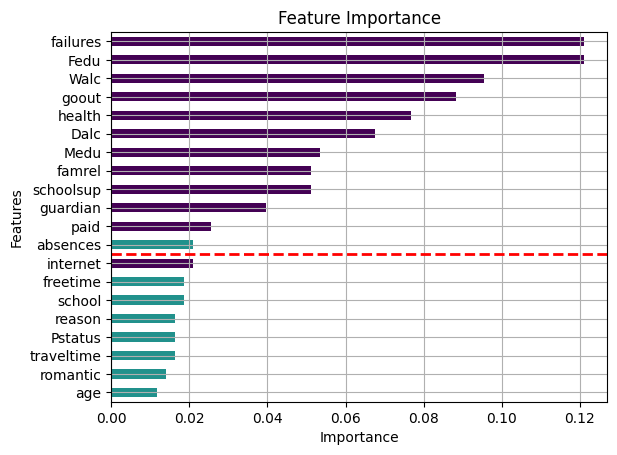

In [14]:
from holisticai.explainability.plots import plot_feature_importance

plot_feature_importance(importances)

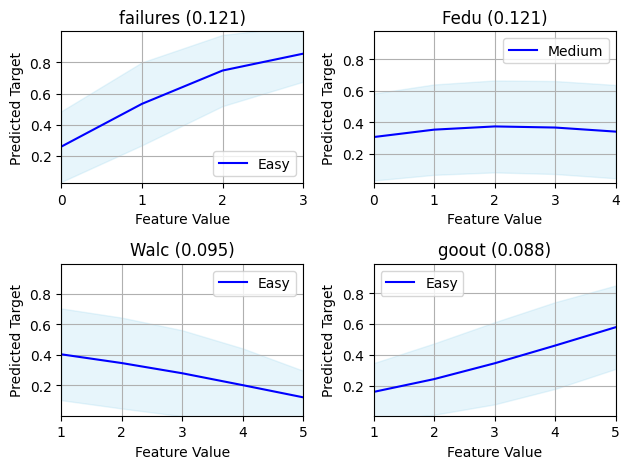

In [15]:
from holisticai.explainability.plots import plot_partial_dependence

plot_partial_dependence(partial_dependencies, ranked_importances, subplots=(2,2), class_idx=0)